This file contains machine learning model that develop used pre trained various VGG16 model that implement image augmentation to the own dataset and produces output of 2 classes

# import library

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import optimizers, regularizers
import matplotlib.pyplot as plt
import random
import os
from tensorflow.keras import layers

# Callback func

In [4]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.975):
            print("\nReached >97,5% validation accuracy so cancelling training!")
            self.model.stop_training = True
        
callbacks = myCallback()

# PreTrain Model

In [5]:
vgg_model=tf.keras.applications.vgg16.VGG16()
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
model=keras.models.Sequential()
for layer in vgg_model.layers[0:-1]:
    model.add(layer)

In [7]:
for layer in model.layers:
    layer.trainable=False
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [8]:
model.add(layers.Dense(2))

In [9]:
loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True)
opt=keras.optimizers.Adam(learning_rate=0.0001)
metrics=['accuracy']
model.compile(optimizer=opt,
              loss= loss,
              metrics=metrics)

In [10]:
preprocess_input=tf.keras.applications.vgg16.preprocess_input

# Dataset and augmentation

In [122]:
base_dir = os.path.join("D:/Dataset/dataset2output/")

# Train set
train_dir = os.path.join(base_dir + "Train")
print("Train set --> ", os.listdir(train_dir))

# Test set
test_dir = os.path.join(base_dir + "Test")
print("Test set --> ", os.listdir(test_dir))

Train set -->  ['padat', 'senggang']
Test set -->  ['padat', 'senggang']


In [124]:
train_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input,
                                                          rescale=1./255,
                                                          rotation_range=55,
                                                          width_shift_range=0.25, # Shifting image width by 20%
                                                          height_shift_range=0.25,# Shifting image height by 20%
                                                          shear_range=0.25,       # Shearing across X-axis by 20%
                                                          zoom_range=0.25,        # Image zooming by 20%
                                                          horizontal_flip=True,
                                                          featurewise_center=True,
                                                          featurewise_std_normalization=True,

                                                          fill_mode = 'nearest')
valid_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input,
                                                          rescale=1./255,
                                                          rotation_range=25,
                                                          horizontal_flip=True)

train_batches=train_gen.flow_from_directory(train_dir,
    target_size = (224, 224),
    class_mode = 'sparse',
    batch_size = 32,
    shuffle=True
)
val_batches=valid_gen.flow_from_directory(test_dir,
    target_size = (224, 224),
    class_mode = 'sparse',
    batch_size = 32,
    shuffle=True)
 

Found 574 images belonging to 2 classes.
Found 82 images belonging to 2 classes.


# Train model

In [125]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

In [126]:
batch_size = 32
history=model.fit(train_batches,
         epochs=100,
         batch_size = 32,
         steps_per_epoch=train_batches.samples//batch_size,
         validation_data=val_batches,
         validation_steps=val_batches.samples//batch_size,
         verbose=1,
         callbacks=[callbacks])

C:\Users\ACER NITRO\AppData\Local\Programs\Python\Python39\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\ACER NITRO\AppData\Local\Programs\Python\Python39\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
17/17 [==============================] - 49s 3s/step - loss: 0.2640 - accuracy: 0.9041 - val_loss: 0.2751 - val_accuracy: 0.9062
Epoch 2/100
17/17 [==============================] - 47s 3s/step - loss: 0.2562 - accuracy: 0.8948 - val_loss: 0.2893 - val_accuracy: 0.8594
Epoch 3/100
17/17 [==============================] - 47s 3s/step - loss: 0.2347 - accuracy: 0.9096 - val_loss: 0.3596 - val_accuracy: 0.8438
Epoch 4/100
17/17 [==============================] - 47s 3s/step - loss: 0.2466 - accuracy: 0.9207 - val_loss: 0.2552 - val_accuracy: 0.9062
Epoch 5/100
17/17 [==============================] - 47s 3s/step - loss: 0.2478 - accuracy: 0.9041 - val_loss: 0.3065 - val_accuracy: 0.8906
Epoch 6/100
17/17 [==============================] - 48s 3s/step - loss: 0.2615 - accuracy: 0.8875 - val_loss: 0.3118 - val_accuracy: 0.8594
Epoch 7/100
17/17 [==============================] - 48s 3s/step - loss: 0.2449 - accuracy: 0.9041 - val_loss: 0.2738 - val_accuracy: 0.8906
Epoch 8/100
1

Epoch 59/100
17/17 [==============================] - 49s 3s/step - loss: 0.1870 - accuracy: 0.9354 - val_loss: 0.2440 - val_accuracy: 0.9062
Epoch 60/100
17/17 [==============================] - 50s 3s/step - loss: 0.2217 - accuracy: 0.9114 - val_loss: 0.3190 - val_accuracy: 0.8594
Epoch 61/100
17/17 [==============================] - 50s 3s/step - loss: 0.2120 - accuracy: 0.9170 - val_loss: 0.2842 - val_accuracy: 0.8906
Epoch 62/100
17/17 [==============================] - 49s 3s/step - loss: 0.2025 - accuracy: 0.9336 - val_loss: 0.3644 - val_accuracy: 0.8125
Epoch 63/100
17/17 [==============================] - 49s 3s/step - loss: 0.2105 - accuracy: 0.9096 - val_loss: 0.3085 - val_accuracy: 0.8281
Epoch 64/100
17/17 [==============================] - 49s 3s/step - loss: 0.2187 - accuracy: 0.9151 - val_loss: 0.2721 - val_accuracy: 0.8750
Epoch 65/100
17/17 [==============================] - 50s 3s/step - loss: 0.2092 - accuracy: 0.9151 - val_loss: 0.3032 - val_accuracy: 0.8594
Epoch 

# Result

In [152]:
test_loss, test_accuracy = model.evaluate(val_batches, verbose=1)
print('Loss : ', test_loss)
print('Accuracy :', test_accuracy)

3/3 [==============================] - 6s 2s/step - loss: 0.2592 - accuracy: 0.9024
Loss :  0.25921016931533813
Accuracy : 0.9024389982223511


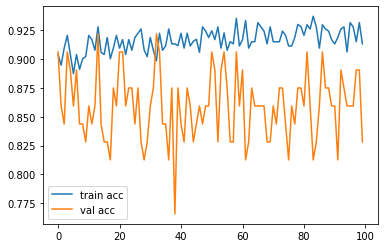

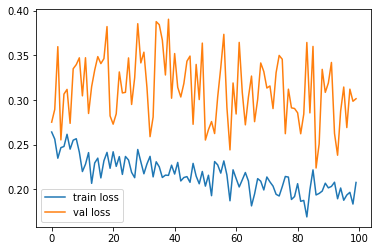

In [128]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# Convert to tflite

In [44]:
# we will train 
import tensorflow as tf
import pathlib

# Construct a basic TF model.
root = tf.train.Checkpoint()
root.v1 = tf.Variable(3.)
root.v2 = tf.Variable(2.)
root.f = tf.function(lambda x: root.v1 * root.v2 * x)

# Save the model into temp directory
export_dir = "D:/Dataset/hasil/transferlearning-imgaug-2out-028-089"
input_data = tf.constant(1., shape=[1, 1])
to_save = root.f.get_concrete_function(input_data)
tf.saved_model.save(root, export_dir, to_save)
# Convert the model into TF Lite.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
#save model 
tflite_model_files = pathlib.Path('D:/Dataset/hasil/transferlearning-imgaug-2out-028-089/save_model_tflite2.tflite')
tflite_model_files.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: D:/Dataset/hasil/transferlearning-imgaug-2out-028-089\assets


INFO:tensorflow:Assets written to: D:/Dataset/hasil/transferlearning-imgaug-2out-028-089\assets


716